In [11]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
imgs_path = 'cropped_imgs_fetal_regions.npy'

In [3]:
imgs = np.load(imgs_path)
imgs.shape

(180, 224, 224, 3)

In [9]:
with open("manual_annot_CRL_Sagittal.txt", "r") as file:
    # Read the contents of the file
    file_contents = file.read()
lines = file_contents.split('\n')
index = [int(i.split(' ')[0]) for i in lines]
labels = [' '.join(i.split(' ')[1:]) for i in lines]
manual_labels_df = pd.DataFrame()
manual_labels_df['Image ID'] = index
manual_labels_df['label'] = labels

manual_labels_df['label'] = manual_labels_df['label'].apply(lambda x: x.strip())

manual_labels_df = manual_labels_df[manual_labels_df['label'] != 'remove']

num_labels = {'head': 0, 'neck': 1, 'body': 2}

manual_labels_df['encoded_label'] = manual_labels_df['label'].map(num_labels)

y = np.array(manual_labels_df['encoded_label'])

In [6]:
base_model = DenseNet121(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs=base_model.input, outputs=x)

In [10]:
X_preprocessed = tf.keras.applications.densenet.preprocess_input(imgs)
features = feature_extractor.predict(X_preprocessed)
print(features.shape) 

6/6 [==============================] - 13s 604ms/step
(180, 1024)


In [15]:
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

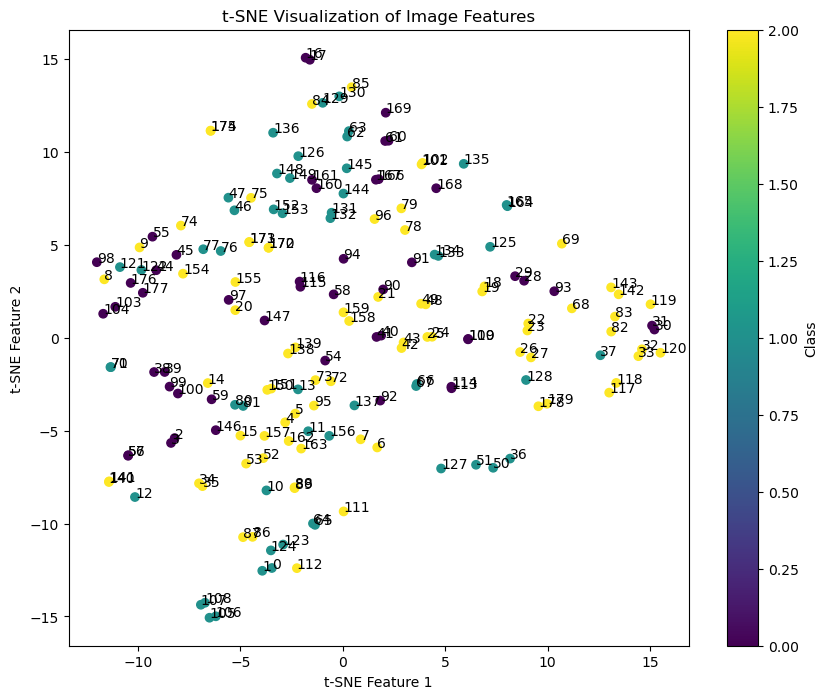

In [18]:
# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y, cmap='viridis')

# Annotate each point with its corresponding image index
for i, txt in enumerate(range(len(imgs))):
    plt.annotate(txt, (tsne_features[i, 0], tsne_features[i, 1]))

plt.colorbar(scatter, label='Class')
plt.title('t-SNE Visualization of Image Features')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()